# Bharat Intern

## Task 2 : Titanic Classification

### by - ARJUNSINGH RAWAT

In [47]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import shap  #for feature importance interpretation

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
# Reading the Titanic dataset
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Filling missing values in the 'Age' column with the mean age
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
# Dropping the 'Cabin' column
df=df.drop('Cabin',axis=1)

In [13]:
# Filling missing values in the 'Embarked' column with the mode value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [14]:
# Checking for missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# Counting the number of survivors and non-survivors
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
# Counting the occurrences of each age value
df['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

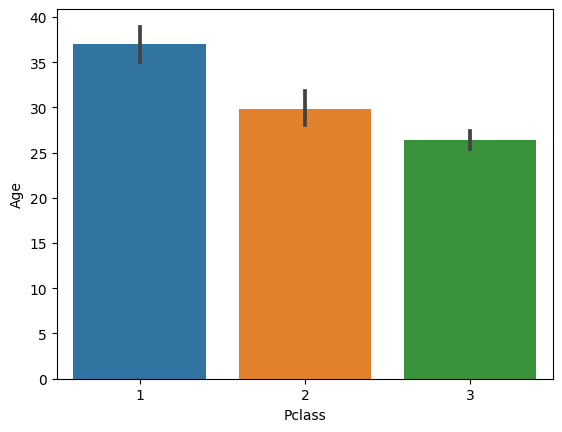

In [17]:
# Creating a bar plot of 'Pclass' vs 'Age'
sns.barplot(x='Pclass',y='Age',data=df)
plt.show()

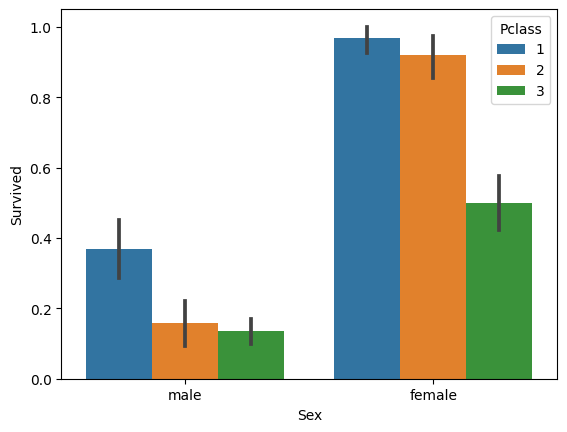

In [18]:
# Creating a bar plot of survival rate by gender and passenger class
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=df)
plt.show()

C:\Users\ARJUN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


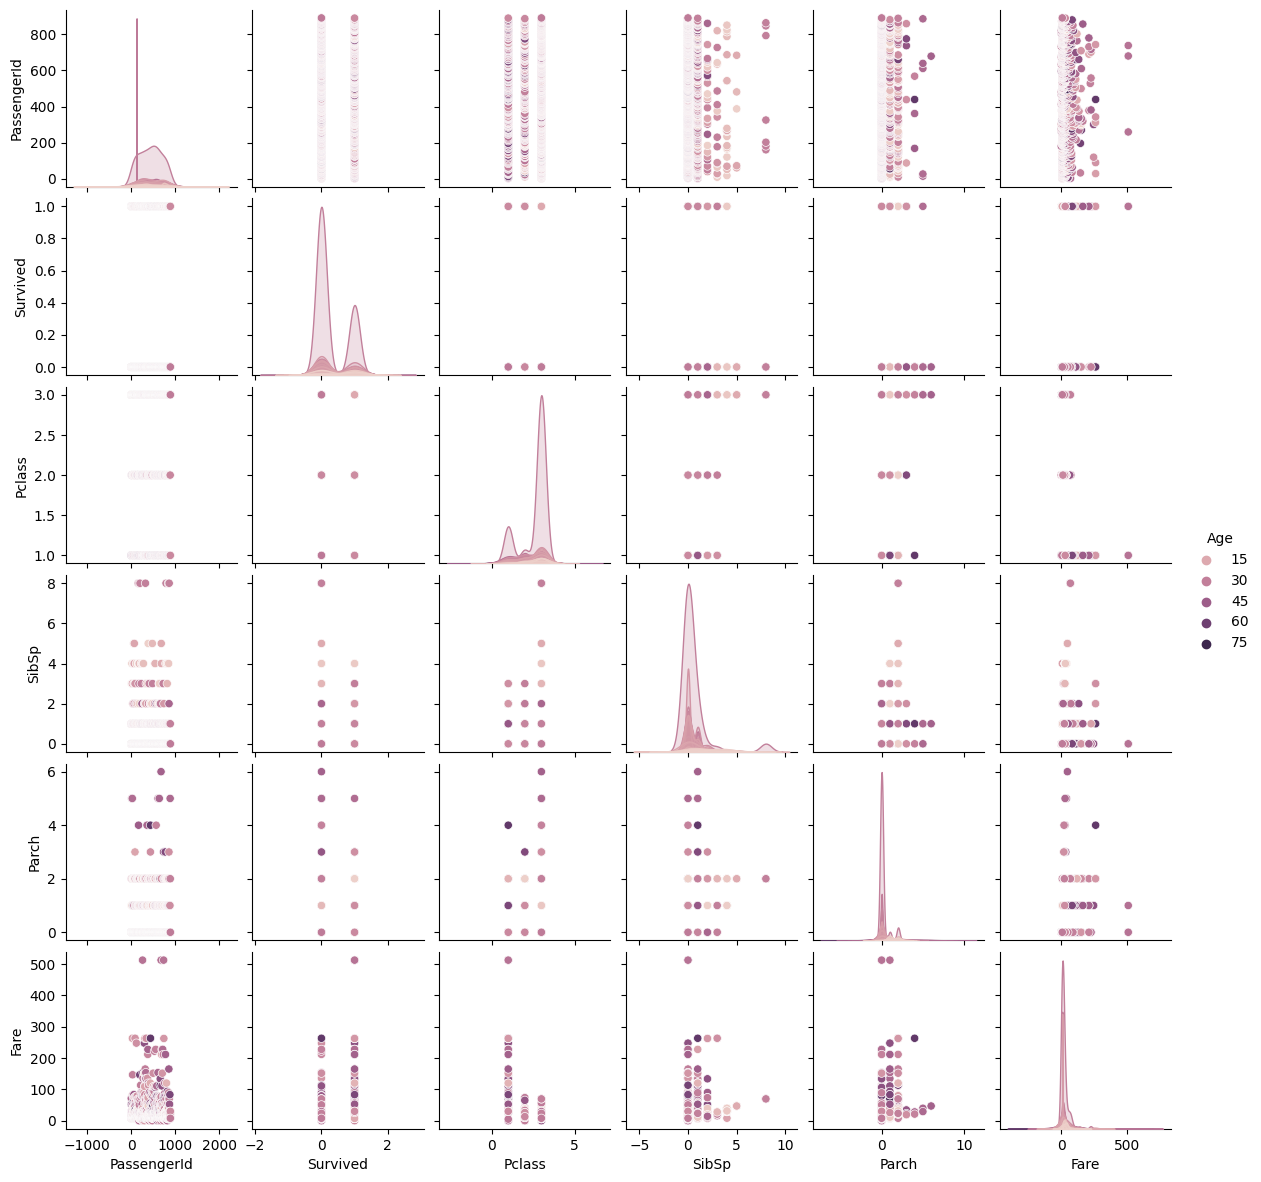

In [19]:
# Creating a pair plot
sns.pairplot(df, hue='Age', height=2)

<Axes: xlabel='Age', ylabel='count'>

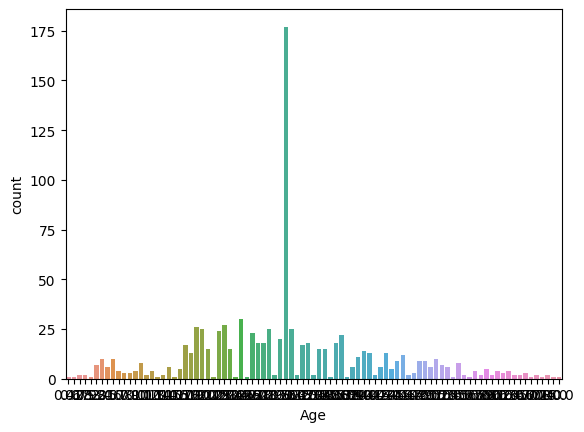

In [20]:
# Creating a count plot for the 'Age' column
sns.countplot(x="Age",data=df)

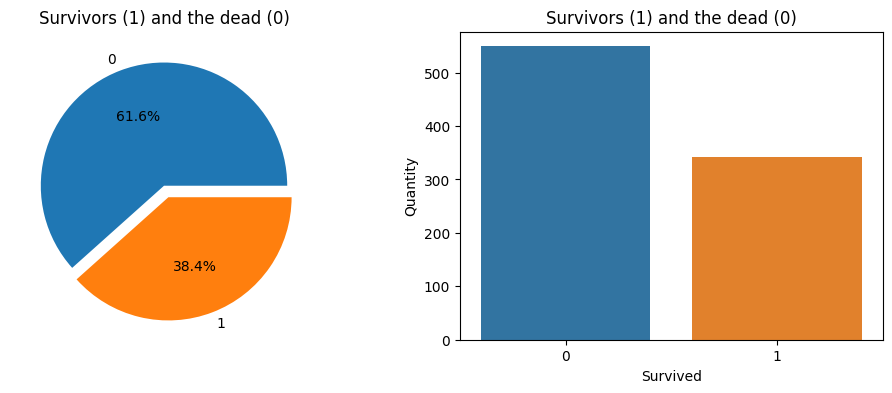

In [9]:
# Creating a pie chart and count plot for survival statistics
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(data=df, x='Survived', ax=ax[1])
ax[1].set_ylabel('Quantity')`
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()

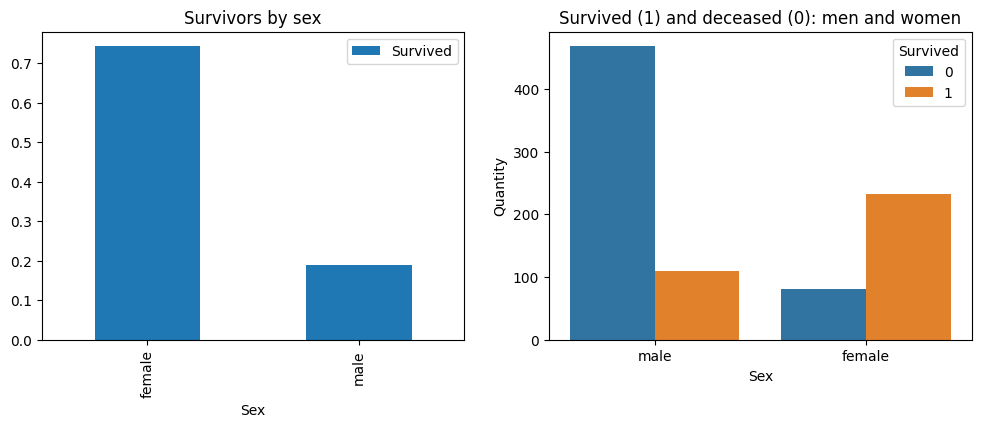

In [10]:
# Creating bar plots for survival rate by gender
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()

In [22]:
# Converting categorical columns to numerical values
df=df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':3}})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [23]:
#Separating features & Target
x=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [24]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [25]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
# Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [43]:
# Initialize and train a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data : ',training_data_accuracy)

Accuracy score of training data :  0.9859550561797753


In [45]:
# Calculate accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data: ', test_data_accuracy)

Accuracy score of test data:  0.8044692737430168


In [48]:
# Evaluate the model using cross-validation
cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print('Cross-validation scores:', cross_val_scores)
print('Mean Cross-validation score:', np.mean(cross_val_scores))

Cross-validation scores: [0.81005587 0.80898876 0.87640449 0.7752809  0.83707865]
Mean Cross-validation score: 0.8215617349821104


In [49]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print('Best parameters:', grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [50]:
# Model evaluation on test data using the best model
y_pred = best_model.predict(x_test)
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       100
           1       0.85      0.59      0.70        79

    accuracy                           0.78       179
   macro avg       0.80      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179

Confusion Matrix:
 [[92  8]
 [32 47]]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


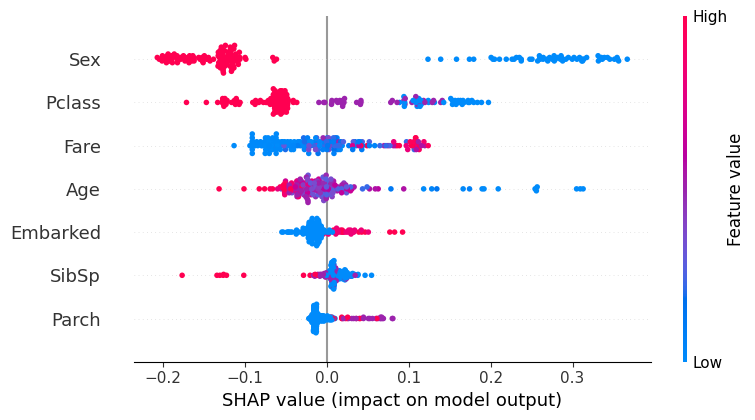

In [51]:
# Interpret feature importances using SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)